In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import ndimage, signal
import pandas as pd

Let us load the data first

In [2]:
labels = np.loadtxt('true_labels_Facial_train.csv', delimiter=',')
data_train = np.load('data_train_Facial.npy', allow_pickle=True)
data_test = np.load('data_test_Facial.npy', allow_pickle=True)
print(data_train.shape)
print(data_test.shape)

(20000, 35, 35)
(10000, 35, 35)


This is an image data set in form of a numpy array.

It contains images of 35x35 pixels. The images are of faces and the labels correspond to their emotional state:

0: happy

1: sad

2: angry

Lets have a look at the images:

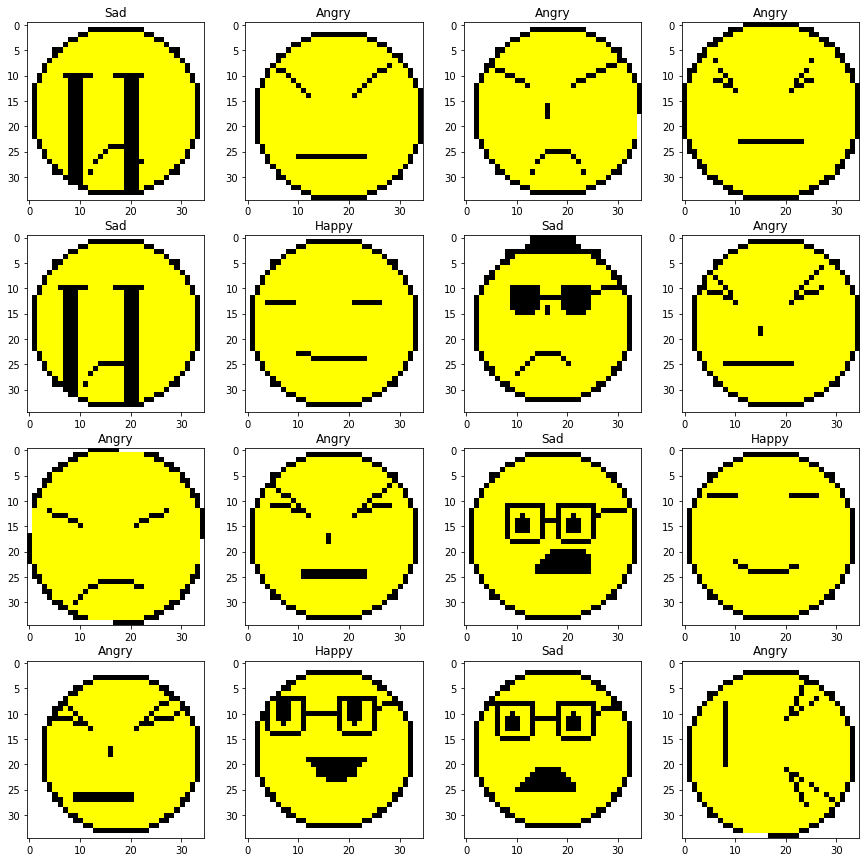

In [4]:
cmap = colors.ListedColormap(['white', 'yellow', 'black'])
Emotions = ['Happy', 'Sad', 'Angry']

plt.figure(figsize = (15,15))
for k in range(16):
    plt.subplot(4,4,k+1)
    plt.imshow(data_train[k,:,:], cmap= cmap)
    plt.title(Emotions[int(labels[k])])

Our biggest problem is to deal with the massive input dimension of 35*35. 

My solution is to use a very simple algorithm. Other solutions could involve reducing the dimension in a smart way and then applying tools from earlier. 

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# we split the training set into a train and a validation set:
data_train_split = data_train[0:int(data_train.shape[0]/2), :, :]
lab_train_split  = labels[0:int(data_train.shape[0]/2)]
data_validation_split = data_train[int(data_train.shape[0]/2)::, :, :]
lab_validation_split  = labels[int(data_train.shape[0]/2)::]

#we train the neirest neighbor classifier on the training set:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(np.reshape(data_train_split, [data_train_split.shape[0], data_train_split.shape[1]*data_train.shape[2]]), lab_train_split)

KNeighborsClassifier(n_neighbors=1)

Next we compute the accuracy of our algorithm on the validation set:

In [7]:
# make prediction:

validation_pred_labels = neigh.predict(np.reshape(data_validation_split, [data_validation_split.shape[0], data_validation_split.shape[1]*data_validation_split.shape[2]]))

# validation accuracy:

accuracy = np.sum(lab_validation_split == validation_pred_labels)/lab_validation_split.shape[0]
print('Accuracy: ' + str(accuracy))

Accuracy: 0.8621


Let us have a look at the misclassified data points to see if there is something conspicuous about them.

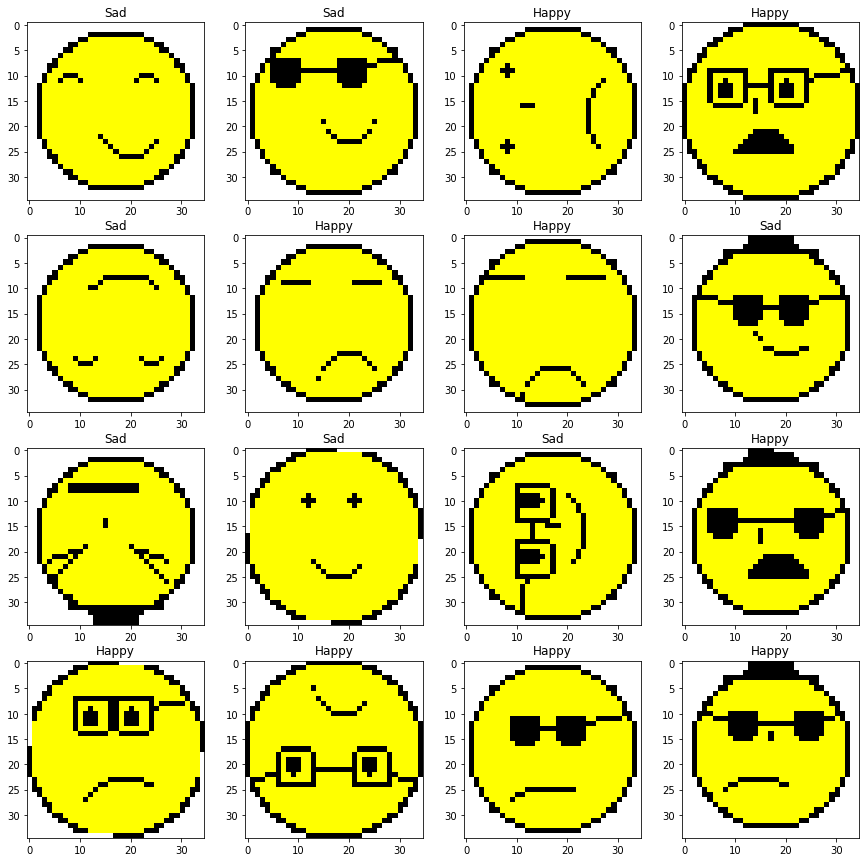

In [9]:
# Let's look at some of the missclassified examples:
mistakes = np.where(lab_validation_split != validation_pred_labels)[0]


cmap = colors.ListedColormap(['white', 'yellow', 'black'])
Emotions = ['Happy', 'Sad', 'Angry']

plt.figure(figsize = (15,15))
for k in range(16):
    plt.subplot(4,4,k+1)
    plt.imshow(data_validation_split[mistakes[k],:,:], cmap= cmap)
    plt.title(Emotions[int(validation_pred_labels[mistakes[k]])])

I am very happy with the accuracy on the validation set. I also have no simple explanation why the faces above were misclassified and therefore no direct way of improving my algorithm. Hence I choose to proceed.

I apply this algorithm to the test set now:

In [10]:
labels_test = neigh.predict(np.reshape(data_test, [data_test.shape[0], data_test.shape[1]*data_test.shape[2]]))

Finally we store the prediction to enter the competition.

In [11]:
np.savetxt('prediction_facial_recognition_PhilippPetersen.csv', labels_test, delimiter=',')

2